# Putting water collection area information to map

- [Working with shapefiles](https://basemaptutorial.readthedocs.io/en/latest/shapefile.html)


(23, 5, [120.33073261301979, 22.130775982125897, 0.0, 0.0], [121.85402507259911, 25.1376893452871, 0.0, 0.0], <matplotlib.collections.LineCollection object at 0x0000020E434987C8>)


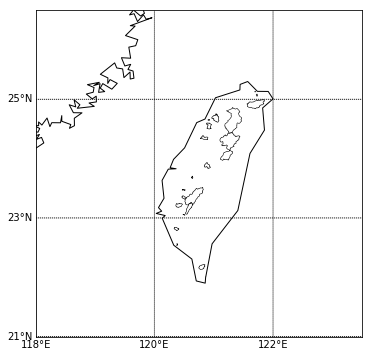

In [8]:
# Load library
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
from matplotlib.patches import PathPatch

# Map of TW
lat0 = 21.0
lat1 = 26.5
lon0 = 118.0
lon1 = 123.5

plt.figure(figsize=(6,6))
m = Basemap(llcrnrlon=lon0, urcrnrlon=lon1, llcrnrlat=lat0, urcrnrlat=lat1, resolution='l')
m.drawcoastlines()
#m.fillcontinents()
m.drawparallels(np.arange(21.0,26.5,2),labels=[1,0,0,1])
m.drawmeridians(np.arange(118.0,123.5,2),labels=[1,0,0,1])

# Read shapefiles
wca = m.readshapefile('../data/water_collecting_area_tpe/reswshed_2019', 'reswshed_2019')

print(wca)

plt.show()

{'AREA': 60291200.313, 'NAME': '日月潭水', 'ID': 12, 'Shape_Leng': 0.422156060207, 'Shape_Area': 0.00534593962151, 'RINGNUM': 1, 'SHAPENUM': 1}
{'AREA': 2496012.813, 'NAME': '鏡面水庫', 'ID': 19, 'Shape_Leng': 0.0923664895636, 'Shape_Area': 0.000219954473164, 'RINGNUM': 1, 'SHAPENUM': 2}
{'AREA': 2894437.188, 'NAME': '鳳山水庫', 'ID': 21, 'Shape_Leng': 0.101885608356, 'Shape_Area': 0.000254136519651, 'RINGNUM': 1, 'SHAPENUM': 3}
{'AREA': 480207200.0, 'NAME': '曾文水庫', 'ID': 16, 'Shape_Leng': 1.24714342743, 'Shape_Area': 0.0424139503181, 'RINGNUM': 1, 'SHAPENUM': 4}
{'AREA': 57548045.0, 'NAME': '烏山頭水', 'ID': 17, 'Shape_Leng': 0.371491359231, 'Shape_Area': 0.00507700797962, 'RINGNUM': 1, 'SHAPENUM': 5}
{'AREA': 109504152.813, 'NAME': '南化水庫', 'ID': 18, 'Shape_Leng': 0.599093397508, 'Shape_Area': 0.00965802654969, 'RINGNUM': 1, 'SHAPENUM': 6}
{'AREA': 29496957.813, 'NAME': '阿公店水', 'ID': 20, 'Shape_Leng': 0.272501970936, 'Shape_Area': 0.00259477578104, 'RINGNUM': 1, 'SHAPENUM': 7}
{'AREA': 65680000.0, 'N

<Figure size 432x288 with 0 Axes>

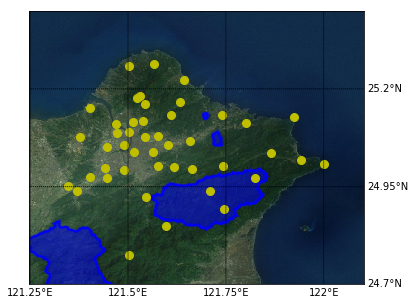

In [40]:
# CWB station info
stdinfo = pd.read_csv('../examples/data/CWB_station_list_cleaned_20191204.csv')
stdinfo.head()
# CWB QPE
evcwb = pd.read_csv('cwb_qpe_eval_2016_wo_negatives.csv')
# Our QPE
evvtp = pd.read_csv('enclr_th-1_test.csv')
# Prepare data for visualization
cwb = pd.merge(stdinfo.loc[:,['id','elevation','lon','lat']], evcwb.loc[:,['id','rmse','corr']], on='id')
vtp = pd.merge(stdinfo.loc[:,['id','elevation','lon','lat']], evvtp.loc[:,['id','rmse','corr']], on='id')
comp = cwb.merge(evvtp.loc[:,['id','rmse','corr']], on='id', suffixes=('_cwb', '_vtp'))

lat0 = np.round(cwb['lat'].min() - 0.1, 1)
lat1 = np.round(cwb['lat'].max() + 0.1, 1)
lon0 = cwb['lon'].min() - 0.1
lon1 = cwb['lon'].max() + 0.1


fig = plt.figure()
#ax = fig.add_subplot(111)

plt.figure(figsize=(6,6))
m = Basemap(llcrnrlon=lon0, urcrnrlon=lon1, llcrnrlat=lat0, urcrnrlat=lat1)#, resolution='l')
m.arcgisimage(service='ESRI_Imagery_World_2D', xpixels=800, verbose= False)
#m.drawcoastlines()
#m.fillcontinents()

# Plot whatershed info
wca = m.readshapefile('../data/water_collecting_area_tpe/reswshed_2019', 'reswshed_2019', drawbounds=True)

#patches   = []

for info, shape in zip(m.reswshed_2019_info, m.reswshed_2019):
    print(info)
    if info['NAME'] in ['翡翠水庫','石門水庫','西勢水庫','新山水庫']:
        #print(info)
        x, y = zip(*shape)
        m.plot(x, y, marker=None,color='b')
        plt.fill(x, y, facecolor='blue', alpha=0.5, edgecolor='blue', linewidth=3)
        #patches.append(Polygon(np.array(shape), True) )
        
#ax.add_collection(PatchCollection(patches, facecolor= 'b', edgecolor='k', linewidths=1., zorder=2))
nrow, ncol = cwb.shape

for i in range(nrow):
    rec = cwb.iloc[i,:]
    m.plot(rec['lon'], rec['lat'], color='y', marker='o', markersize=8)

m.drawparallels(np.round(np.arange(lat0,lat1,0.25),2),labels=[0,1,0,1])
m.drawmeridians(np.round(np.arange(lon0,lon1,0.25),2),labels=[1,0,0,1])

plt.show()